In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score ,mean_squared_error

In [52]:
data = pd.read_csv("/content/Cardetails.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [53]:
data.drop(columns=['torque'],inplace=True)

In [54]:
data.shape

(8128, 12)

In [55]:
#NULL CHECK

In [56]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [57]:
data.dropna(inplace=True)

In [58]:
data.shape

(7907, 12)

In [59]:
#DUPLICATE CHECK

In [60]:
data.duplicated().sum()

1189

In [61]:
data.drop_duplicates(inplace=True)

In [62]:
data.shape

(6718, 12)

In [63]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


DATA ANALYSIS

In [65]:
for col in data.columns:
  print('Unique values of' +col)
  print(data[col].unique())
  print("**************************\n")

Unique values ofname
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
**************************

Unique values ofyear
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
**************************

Unique values ofselling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1

In [20]:
data.iloc[data.selling_price.argmax()]["name"]

'Volvo XC90 T8 Excellence BSIV'

In [ ]:
data["Type"] = data.name.apply(lambda x :x.split()[0])

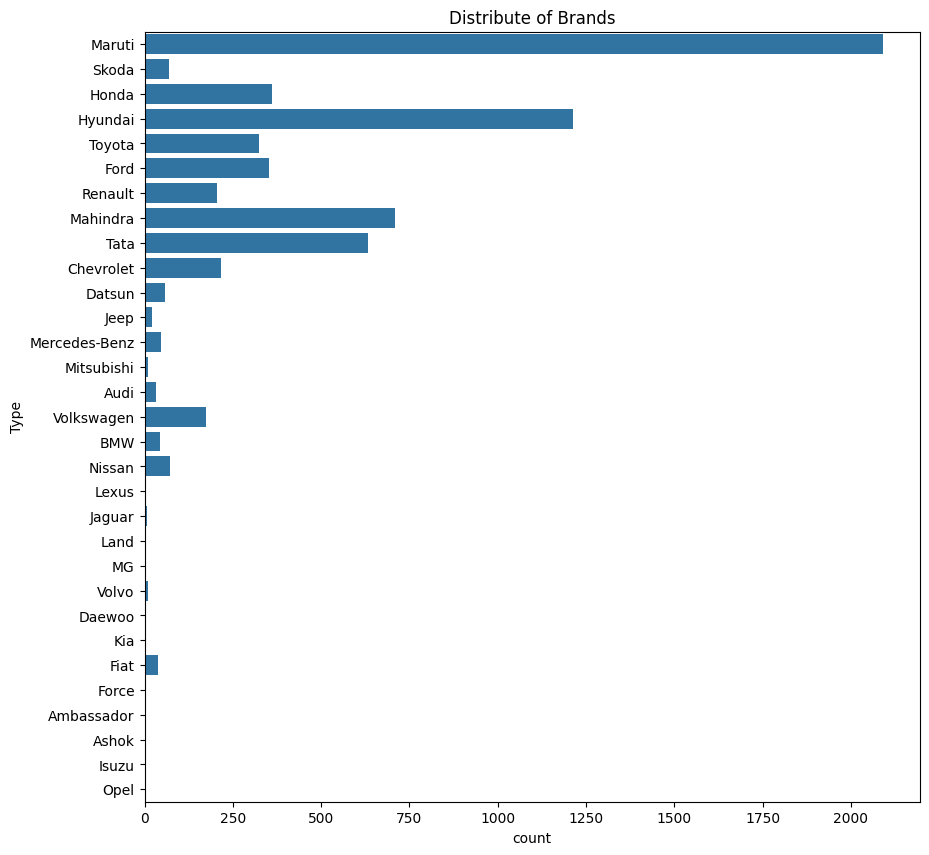

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Distribute of Brands")

sns.countplot(y=data.Type)
plt.show()

In [ ]:
pd.DataFrame(data.Type.value_counts()[:5])

,count
Type,
Maruti,2090
Hyundai,1214
Mahindra,709
Tata,633
Honda,361


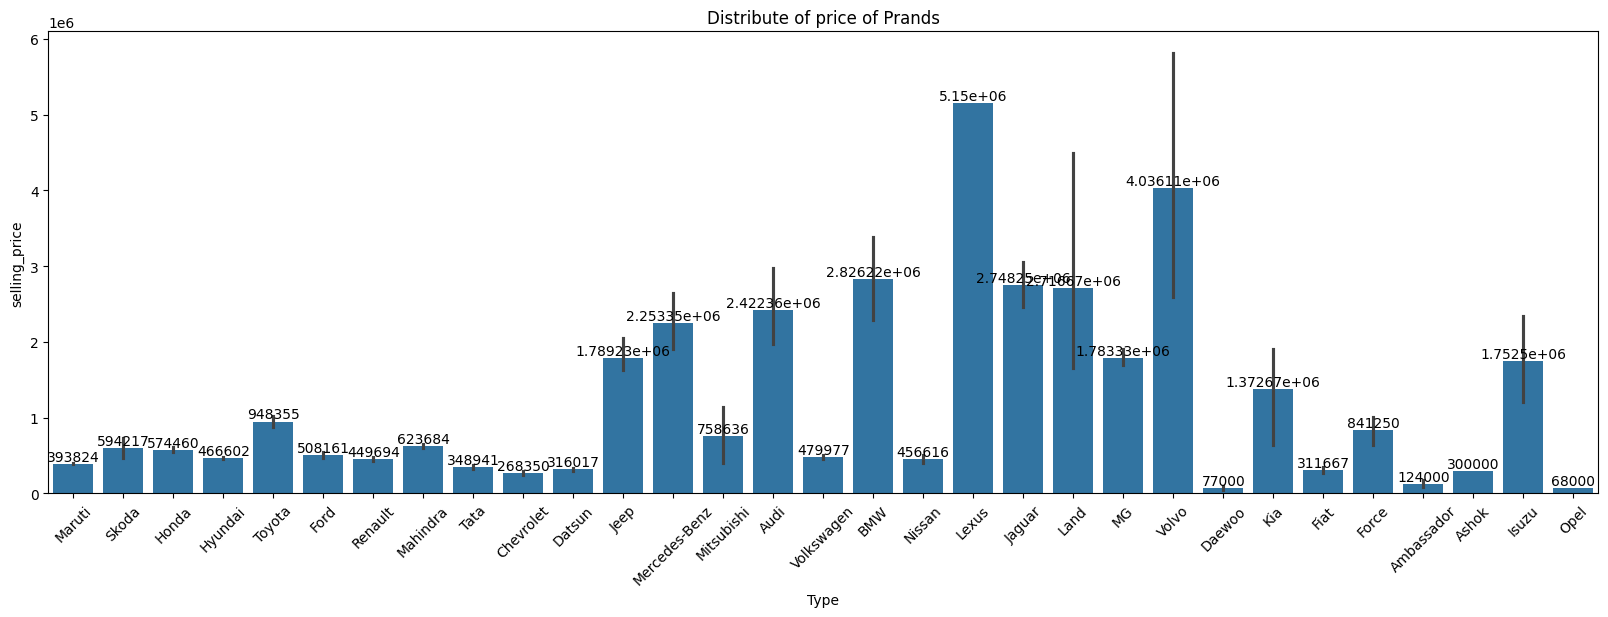

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Distribute of price of Prands")
figure = sns.barplot(data= data , x ="Type" ,y="selling_price")
for contain in figure.containers :
    figure.bar_label(contain)
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.DataFrame(np.round(data.groupby("Type")["selling_price"].mean(),2).sort_values(ascending=False))


,selling_price
Type,
Lexus,5150000.00
Volvo,4036111.11
BMW,2826222.22
Jaguar,2748250.00
Land,2716666.67
Audi,2422363.55
Mercedes-Benz,2253347.83
Jeep,1789227.23
MG,1783333.33


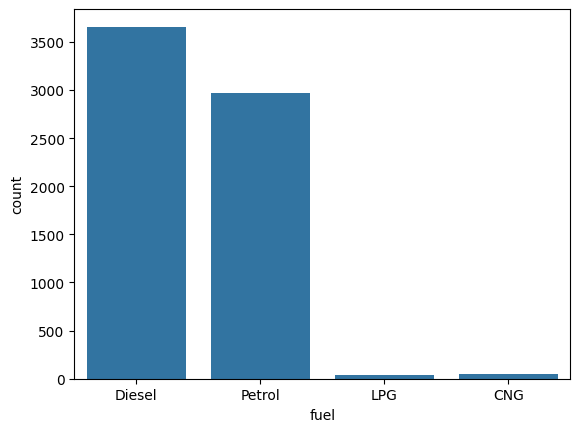

In [ ]:
sns.countplot(data =data , x= "fuel")
plt.show()

In [ ]:
pd.DataFrame(data.fuel.value_counts())

,count
fuel,
Diesel,3658
Petrol,2973
CNG,52
LPG,35


Type of oldest car

In [ ]:
data.iloc[data.year.argmin()]["name"]

'Maruti 800 AC'

<Axes: xlabel='transmission', ylabel='count'>

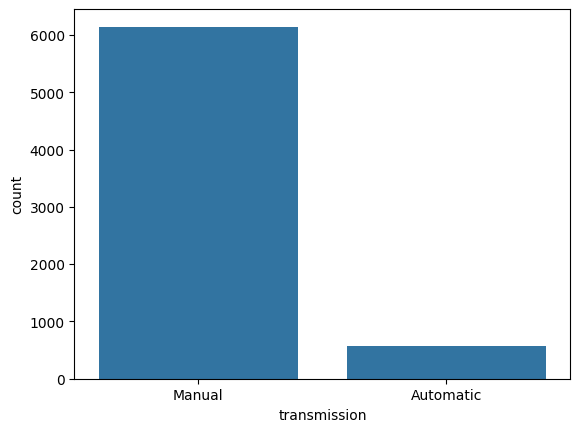

In [ ]:
sns.countplot(x= data["transmission"])

In [66]:
def get_brand_name(car_name):
  car_name = car_name.split(' ')[0]
  return car_name.strip()

In [67]:
def clean_data(value):
  value = value.split(' ')[0]
  value=value.strip()
  if value == '':
    value = 0
  return float(value)

In [68]:
get_brand_name('Maruti Swift Dzire VDI')

'Maruti'

In [69]:
data['name'] = data['name'].apply(get_brand_name)

In [70]:
data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [71]:
data['mileage'] = data['mileage'].apply(clean_data)

In [72]:
data['mileage'].unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 17.3 , 23.59, 20.  ,
       19.01, 19.3 , 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  , 25.5 ,
       26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 , 14.  ,
       18.6 , 33.44, 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 , 18.5 ,
       12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36, 17.68,
       14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  , 25.1 ,
       20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71, 23.1 ,
       19.02, 19.81, 26.2 , 16.47, 15.04, 19.1 , 21.79, 18.8 , 21.21,
       15.37, 11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32, 21.9 ,
       14.53, 21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92, 17.01,
       22.37, 19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  , 13.96,
       18.  , 12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 , 19.56,
       22.69, 19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 , 19.44,
       13.  , 21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 , 26.6 ,
       17.6 , 28.4 ,

In [73]:
data['max_power'] = data['max_power'].apply(clean_data)

In [74]:
data['engine'] = data['engine'].apply(clean_data)

In [75]:
for col in data.columns:
  print('Unique values of' +col)
  print(data[col].unique())
  print("**************************\n")

Unique values ofname
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
**************************

Unique values ofyear
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
**************************

Unique values ofselling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   26500

In [76]:
data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                     [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],inplace=True)

In [77]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [78]:
data['transmission'].replace(['Manual','Automatic'],[1,2],inplace=True)

In [79]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [80]:
data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3],inplace=True)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [82]:
data['fuel'].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [83]:
data['fuel'].replace(['Diesel','Petrol','LPG','CNG'],[1,2,3,4],inplace=True)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [85]:
data.reset_index(inplace=True)

In [86]:
data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [87]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [88]:
data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner','Test Drive Car'],[1,2,3,4,5],inplace=True)


In [89]:
data

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [90]:
data.drop(columns=['index'],inplace=True)


In [91]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [92]:
input_data= data.drop(columns=['selling_price'])
output_data= data['selling_price']

In [93]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2)

MODEL CREATION

In [94]:
model=LinearRegression()

In [95]:
model.fit(x_train,y_train)

LinearRegression()

In [96]:
predict= model.predict(x_test)

In [97]:
predict

array([111557.07627048, 435833.99452245, 487503.74041793, ...,
       300988.72408003, 638138.33901368, 856596.55179277])

In [98]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
175,4,2014,60000,2,1,1,2,18.9,1197.0,82.0,5.0


In [125]:
input_data_model=pd.DataFrame(
    [[1,2021,10000,2,1,1,2,18.9,1197.0,82.0,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats']
)

In [126]:
input_data_model

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2021,10000,2,1,1,2,18.9,1197.0,82.0,5.0


In [127]:
model.predict(input_data_model)

array([695915.22085735])

In [128]:
model = LinearRegression()
model.fit(x_train ,y_train)

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(y_train,y_train_predict))


y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(y_test,y_test_predict))

acc of train 0.618464806497496
acc of test 0.6037299069158987


In [129]:
model = LinearRegression()
model.fit(x_train ,np.log(y_train))
#Log Transformation: improve model performance
y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))


y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.8514368447659016
acc of test 0.842255456153035


In [130]:
model = DecisionTreeRegressor(max_depth=6)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))


y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.8726509464960701
acc of test 0.8542105238982085


In [131]:
model = RandomForestRegressor(n_estimators=100 , max_depth=6,max_leaf_nodes=42,max_features=50)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))


y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.8911918302752058
acc of test 0.8737222008237197


In [132]:
model = XGBRegressor(n_estimators=60 , max_depth=4)
model.fit(x_train ,np.log(y_train))

y_train_predict = model.predict(x_train)

print('acc of train' , r2_score(np.log(y_train),y_train_predict))


y_test_predict = model.predict(x_test)

print('acc of test' , r2_score(np.log(y_test)
                               ,y_test_predict))

acc of train 0.9422319061982256
acc of test 0.9120990486385869


In [133]:
model=XGBRegressor()

In [134]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [135]:
predict= model.predict(x_test)

In [136]:
predict

array([191507.86, 333850.7 , 557460.1 , ..., 326314.4 , 886075.4 ,
       673804.25], dtype=float32)

In [137]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
175,4,2014,60000,2,1,1,2,18.9,1197.0,82.0,5.0


In [153]:
input_data_models=pd.DataFrame(
    [[21,2022,8000,2,1,1,2,19,1197.0,82.0,5.0]],
    columns=['name','year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats']
)

In [155]:
input_data_models

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,21,2022,8000,2,1,1,2,19,1197.0,82.0,5.0


In [154]:
model.predict(input_data_models)

array([837383.9], dtype=float32)

In [157]:
import pickle as pk
pk.dump(model,open('model.pkl','wb'))